This will be a demo file that shows how to take a Fourier transform of an EEG file and how to interpret it, it involves MNE which is a signal processing library. 

In [1]:
#import some libraries, make sure that you have imported mne into the environment you are running using "pip install mne" through the terminal while the environment is active
import scipy.io
import numpy as np
import mne

(8, 3267)
Creating RawArray with float64 data, n_channels=8, n_times=3267
    Range : 0 ... 3266 =      0.000 ...   102.062 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 64.000 (s)


C:\Users\Jacob\AppData\Local\Temp\ipykernel_13664\677931239.py:17: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_array.plot_psd(picks=['1','2','3','4','5','6','7','8'],fmin=0,fmax=16)
c:\Users\Jacob\AppData\Local\Programs\Python\Python39\lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


AttributeError: No mne.time_frequency attribute psd_welch

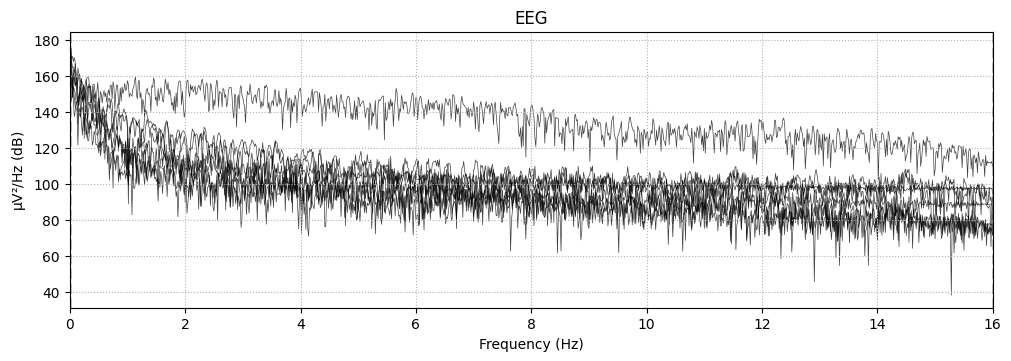

In [2]:
#raw data is the actual EEG data, how you load this will depend on where your EEG data is coming from
mat = scipy.io.loadmat("EEG_Clip1.mat")
raw_data = mat["ThisEEG"]

#you can see this is an 8x3267 array, 8 channels by 3267 EEG values
print(np.shape(raw_data))

#we will need an info object, it contains some variables about our EEG signal, notably we set the second value to be 32, as the ASERTAIN dataset is sampled at 32 Hz
#this will be changed to 256 for the Muse at it samples at 256 Hz
#if you know the channel names, which we do for the Muse, we can add them, I don't think we do for the ASERTAIN set so I am just adding numbers
info = mne.create_info(ch_names=['1','2','3','4','5','6','7','8'], sfreq = 32, ch_types="eeg")

#we need to move our numpy array into an mne raw array for processing (there are different types but I dont understand them)
raw_array = mne.io.RawArray(raw_data, info)

#you can call the below function on your raw array to plot the psd (fourier transform results basically)
raw_array.plot_psd(picks=['1','2','3','4','5','6','7','8'],fmin=0,fmax=16)

#this actually performs the Fourier transform, you can specify what frequencies you want calculated as well as what channels you want to include
#i set the max frequency to half of the sampling frequency, idk if this makes sense, just make sure the frequency range of interest (alpha, beta, etc) is included
fourier_mne=mne.time_frequency.psd_welch(raw_array,fmin=0,fmax=16,picks=['1','2','3','4','5','6','7','8'])

#you want to then move the object back into a numpy array as it makes it much easier to work with
fourier_data = np.array(fourier_mne)

In [26]:
#the result is two matrices stored in the fourier_data matrix
#the first entry is the results of the fourier transform, how much each frequency is represented in all of the 8 channels
#the second entry is the frequencies that had their "representation" or power calculated
print(np.shape(fourier_data[0]))
print(np.shape(fourier_data[1]))
print(fourier_data[0])
print(fourier_data[1])

(8, 129)
(129,)
[[1.81934729e+02 7.51499372e+02 1.47061772e+03 ... 9.77801476e-02
  3.21633005e-02 2.19151652e-02]
 [4.08479885e+03 4.33340286e+04 9.82875232e+03 ... 4.45666799e-02
  4.83793945e-02 1.86568006e-02]
 [6.93234482e+03 2.73865530e+04 8.43362138e+03 ... 9.16483820e-03
  1.25058500e-02 4.43575564e-03]
 ...
 [5.78312667e+01 5.15085522e+02 6.69538399e+01 ... 3.43424827e-03
  3.19369883e-03 1.69614895e-03]
 [2.79368905e+01 1.50247322e+02 4.26061090e+01 ... 2.40287226e-04
  1.66539851e-04 1.12933419e-04]
 [7.22220409e+02 5.77605038e+03 1.53253084e+03 ... 3.30881234e-03
  3.28432015e-03 1.70942873e-03]]
[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.     1.125
  1.25   1.375  1.5    1.625  1.75   1.875  2.     2.125  2.25   2.375
  2.5    2.625  2.75   2.875  3.     3.125  3.25   3.375  3.5    3.625
  3.75   3.875  4.     4.125  4.25   4.375  4.5    4.625  4.75   4.875
  5.     5.125  5.25   5.375  5.5    5.625  5.75   5.875  6.     6.125
  6.25   6.375  6.5    6.625 